## Decision Tree Classifier 
### It is used to predict survival rate in titanic dataset

In [1]:
#Importing Main Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [2]:
#Now loading dataset 
df = pd.read_csv(r'C:\Users\preet\Desktop\Top 10 ML Model Coding\titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#Separate our target feature from our dataset
Y = df['Survived']
Y.shape

(891,)

In [4]:
#Now separating our main features for training and testing
X = df[['Pclass','Sex','Age','Fare']]
X.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [5]:
#Now checking null values in the dataset
X.isnull().sum()

Pclass      0
Sex         0
Age       177
Fare        0
dtype: int64

In [6]:
#Only age varaible have null values, to replace null value 
#I am calculating mean of the Age feature
mean = df['Age'].mean()
mean

29.69911764705882

In [7]:
#Now filling null values with mean that we have calculated in above cell
X['Age'] = X['Age'].fillna(mean)
X['Age'].isnull().sum()

C:\Users\preet\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0

In [8]:
#Now once again checking null values in our dataset
#Now dataset has now null values
X.isnull().sum()

Pclass    0
Sex       0
Age       0
Fare      0
dtype: int64

In [9]:
#Now checking how many male and female in the dataset
X['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [10]:
#Final checking size of the dataset
X.shape

(891, 4)

In [11]:
#Checking datatypes of the features.
X.dtypes

Pclass      int64
Sex        object
Age       float64
Fare      float64
dtype: object

In [12]:
# #Manually changing categorical variables into the numerical values
# df['Sex'] = df[df['Sex']=='male'] = 0
# df['Sex'] = df[df['Sex']=='female'] = 1
# df['Sex'].dtype

In [13]:
#Now converting categorical data into the numerical values 
#By using LabelEncoder package
sex_encoder = LabelEncoder()
X['Sex_n'] = sex_encoder.fit_transform(X['Sex']) #Adding into the dataset
X.head()

C:\Users\preet\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Pclass,Sex,Age,Fare,Sex_n
0,3,male,22.0,7.2500,1
1,1,female,38.0,71.2833,0
2,3,female,26.0,7.9250,0
3,1,female,35.0,53.1000,0
4,3,male,35.0,8.0500,1


In [14]:
X_n = X.drop(['Sex'], axis='columns') #Now removing sex column from dataset because it contains categorical values
X_n.head()

,Pclass,Age,Fare,Sex_n
0,3,22.0,7.2500,1
1,1,38.0,71.2833,0
2,3,26.0,7.9250,0
3,1,35.0,53.1000,0
4,3,35.0,8.0500,1


In [15]:
X_n.isnull().sum()

Pclass    0
Age       0
Fare      0
Sex_n     0
dtype: int64

In [16]:
#After cleaning our dataset Now converting dataset into training and testing 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_n, Y, test_size=0.15, random_state=0)
X_train.shape

(757, 4)

In [17]:
#Now creating object of the decisionTreeClasssifier
dT = DecisionTreeClassifier()

In [18]:
#Now training our model with trainig data
dT.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [19]:
#Now predicting our model by using test data and displaying first 5 prediction
predict = dT.predict(X_test)
predict[:5]

array([0, 0, 0, 1, 0], dtype=int64)

In [20]:
#User Prediction
dT.predict([[2, 23, 45.3, 1]])

array([0], dtype=int64)

In [21]:
#user Prediction
dT.predict([[1, 33, 40.4, 0]])

array([1], dtype=int64)

In [22]:
#Checking accracy of the model with testing data.
print('Accuracy of the Model:', dT.score(X_test, y_test))

Accuracy of the Model: 0.7985074626865671


In [23]:
#Now Evaluating the model by using counfusion matrix and classification report.
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test,predict))

[[68 11]
 [16 39]]


In [24]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        79
           1       0.78      0.71      0.74        55

    accuracy                           0.80       134
   macro avg       0.79      0.78      0.79       134
weighted avg       0.80      0.80      0.80       134



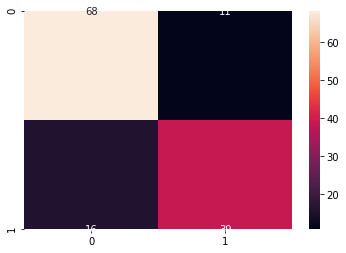

In [25]:
#Now visauling our model by using confusion matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, predict), annot=True)
plt.show()

### True Neagtive = 68
### False Negative = 11
### False Positive = 16
### True Positive = 39

[Text(375.1963969983553, 1060.02, 'X[3] <= 0.5\ngini = 0.471\nsamples = 757\nvalue = [470, 287]'),
 Text(174.2526315789474, 1005.6600000000001, 'X[0] <= 2.5\ngini = 0.385\nsamples = 265\nvalue = [69, 196]'),
 Text(90.06315789473685, 951.3000000000001, 'X[1] <= 2.5\ngini = 0.108\nsamples = 140\nvalue = [8, 132]'),
 Text(82.23157894736842, 896.94, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(97.89473684210527, 896.94, 'X[2] <= 28.856\ngini = 0.096\nsamples = 139\nvalue = [7, 132]'),
 Text(82.23157894736842, 842.58, 'X[2] <= 28.231\ngini = 0.194\nsamples = 55\nvalue = [6, 49]'),
 Text(74.4, 788.22, 'X[1] <= 56.0\ngini = 0.168\nsamples = 54\nvalue = [5, 49]'),
 Text(54.82105263157895, 733.8600000000001, 'X[1] <= 37.0\ngini = 0.142\nsamples = 52\nvalue = [4, 48]'),
 Text(39.15789473684211, 679.5, 'X[1] <= 27.5\ngini = 0.097\nsamples = 39\nvalue = [2, 37]'),
 Text(31.326315789473686, 625.1400000000001, 'X[1] <= 23.5\ngini = 0.188\nsamples = 19\nvalue = [2, 17]'),
 Text(23.49473684210526

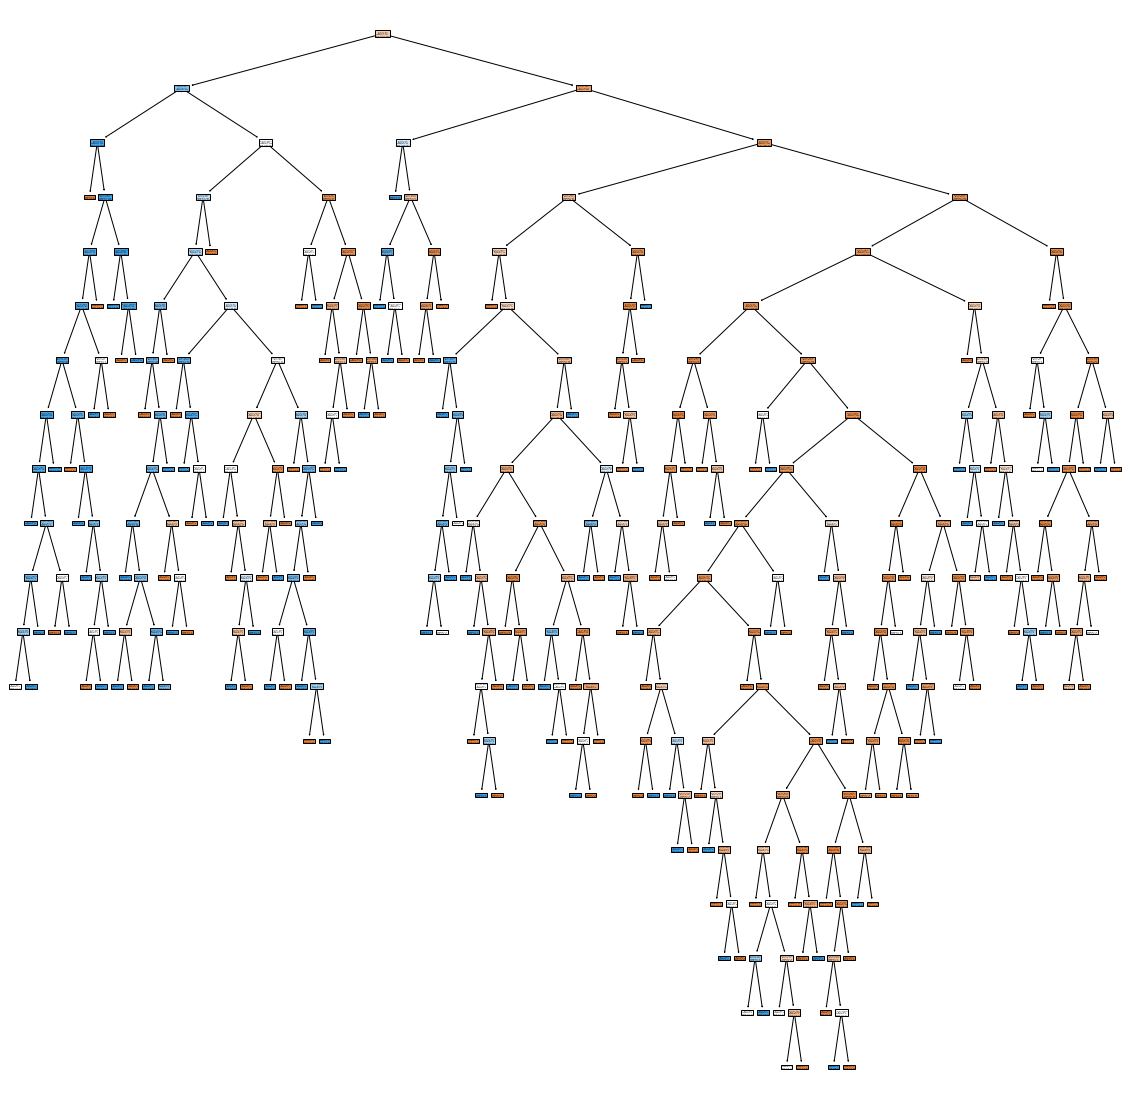

In [44]:
#Visualizing Decision Tree
from sklearn import tree
plt.figure(figsize=(20, 20))
tree.plot_tree(dT, filled=True)

# Iris Dataset

In [45]:
#Using Decision Tree Classifier on Iris Dataset
from sklearn.datasets import load_iris

#load dataset
load = load_iris()

In [46]:
#Creating dataframe of the dataset

X = pd.DataFrame(load.data, columns=load.feature_names)
target = load.target

In [28]:
target_names = list(load.target_names)
target_names

['setosa', 'versicolor', 'virginica']

In [29]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [30]:
#Now splitting dataset into traing and testing
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.20, random_state=0)
print(X_train.shape, X_test.shape)

(120, 4) (30, 4)


In [31]:
#Now creating object of the Decision tree
model_gini = DecisionTreeClassifier(criterion='gini')
model_entropy = DecisionTreeClassifier(criterion='entropy')

In [32]:
model_gini.fit(X_train, y_train)
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [33]:
y_predict_gini = model_gini.predict(X_test)
y_predict_entropy = model_entropy.predict(X_test)

In [34]:
predicted_with_gini = pd.DataFrame({"Actual":y_test, "Predicted":y_predict_gini})
predicted_with_gini.head()

,Actual,Predicted
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0


In [35]:
predicted_with_entropy = pd.DataFrame({"Actual":y_test, 'Predicte':y_predict_entropy})
predicted_with_entropy.head()

,Actual,Predicte
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0


# Model Evaluation

In [36]:
print("Accuracy with GINI: ", model_gini.score(X_test, y_test))
print("Accuracy with Entropy: ", model_entropy.score(X_test, y_test))

Accuracy with GINI:  1.0
Accuracy with Entropy:  1.0


In [37]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_predict_gini),"\n", classification_report(y_test, y_predict_gini))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]] 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



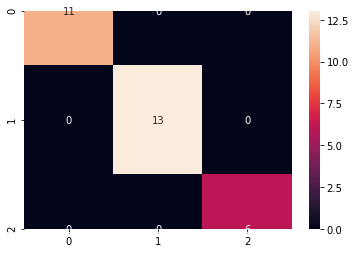

In [38]:
confusion = confusion_matrix(y_test, y_predict_gini)
sns.heatmap(confusion, annot=True)
plt.show()

[Text(390.6, 697.62, 'X[2] <= 2.35\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'),
 Text(330.50769230769237, 570.78, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(450.69230769230774, 570.78, 'X[3] <= 1.75\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]'),
 Text(240.3692307692308, 443.94, 'X[2] <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]'),
 Text(120.1846153846154, 317.1, 'X[3] <= 1.65\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(60.0923076923077, 190.26, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(180.27692307692308, 190.26, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(360.55384615384617, 317.1, 'X[3] <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(300.4615384615385, 190.26, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(420.6461538461539, 190.26, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(360.55384615384617, 63.42000000000007, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(480

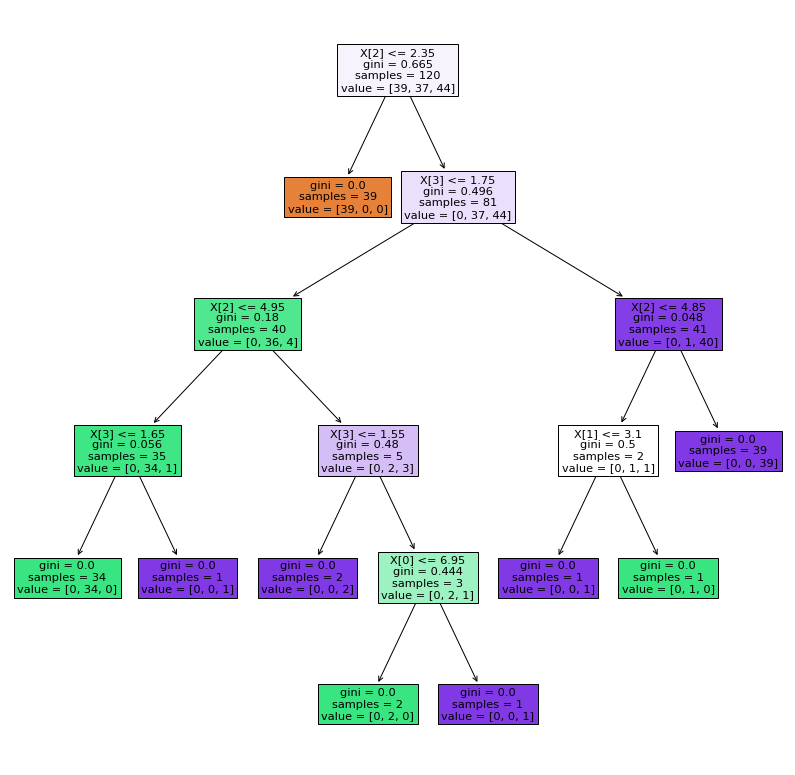

In [47]:
#Now Visualizing 
from sklearn import tree
plt.figure(figsize=(14, 14))
tree.plot_tree(model_gini, filled=True)